# Importing important libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.feature_selection import SelectPercentile, f_classif
# over sampling for balancing the target values.
from imblearn.over_sampling import SMOTE

# optuna for hyper parameter tuning
import optuna

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Reading the data

In [9]:
# reading both train and test data
data = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [10]:
data

country  year       uniqueid bank_account location_type  \
0       Kenya  2018     uniqueid_1          Yes         Rural   
1       Kenya  2018     uniqueid_2           No         Rural   
2       Kenya  2018     uniqueid_3          Yes         Urban   
3       Kenya  2018     uniqueid_4           No         Rural   
4       Kenya  2018     uniqueid_5           No         Urban   
...       ...   ...            ...          ...           ...   
23519  Uganda  2018  uniqueid_2113           No         Rural   
23520  Uganda  2018  uniqueid_2114           No         Rural   
23521  Uganda  2018  uniqueid_2115           No         Rural   
23522  Uganda  2018  uniqueid_2116           No         Urban   
23523  Uganda  2018  uniqueid_2117           No         Rural   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes               3                 24   
1                   No               5                 70   
2                  Yes               5                 26   
3                  Yes               5                 34   
4                   No               8                 26   
...                ...             ...                ...   
23519              Yes               4                 48   
23520              Yes               2                 27   
23521              Yes               5                 27   
23522              Yes               7                 30   
23523              Yes              10                 20   

      gender_of_respondent relationship_with_head           marital_status  \
0                   Female                 Spouse  Married/Living together   
1                   Female      Head of Household                  Widowed   
2                     Male         Other relative     Single/Never Married   
3                   Female      Head of Household  Married/Living together   
4                     Male                  Child     Single/Never Married   
...                    ...                    ...                      ...   
23519               Female      Head of Household       Divorced/Seperated   
23520               Female      Head of Household     Single/Never Married   
23521               Female                 Parent                  Widowed   
23522               Female                 Parent       Divorced/Seperated   
23523                 Male                  Child     Single/Never Married   

                       education_level                   job_type  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 13 columns]

In [11]:
test

country  year       uniqueid location_type cellphone_access  \
0       Kenya  2018  uniqueid_6056         Urban              Yes   
1       Kenya  2018  uniqueid_6060         Urban              Yes   
2       Kenya  2018  uniqueid_6065         Rural               No   
3       Kenya  2018  uniqueid_6072         Rural               No   
4       Kenya  2018  uniqueid_6073         Urban               No   
...       ...   ...            ...           ...              ...   
10081  Uganda  2018  uniqueid_2998         Rural               No   
10082  Uganda  2018  uniqueid_2999         Urban              Yes   
10083  Uganda  2018  uniqueid_3000         Urban              Yes   
10084  Uganda  2018  uniqueid_3001         Rural              Yes   
10085  Uganda  2018  uniqueid_3002         Urban              Yes   

       household_size  age_of_respondent gender_of_respondent  \
0                   3                 30                 Male   
1                   7                 51                 Male   
2                   3                 77               Female   
3                   6                 39               Female   
4                   3                 16                 Male   
...               ...                ...                  ...   
10081               2                 62               Female   
10082               8                 42                 Male   
10083               1                 39                 Male   
10084               6                 28               Female   
10085               7                 16                 Male   

      relationship_with_head           marital_status  \
0          Head of Household  Married/Living together   
1          Head of Household  Married/Living together   
2                     Parent  Married/Living together   
3          Head of Household  Married/Living together   
4                      Child     Single/Never Married   
...                      ...                      ...   
10081                 Spouse  Married/Living together   
10082      Head of Household  Married/Living together   
10083      Head of Household     Single/Never Married   
10084                 Spouse  Married/Living together   
10085         Other relative     Single/Never Married   

                       education_level                      job_type  
0                  Secondary education  Formally employed Government  
1      Vocational/Specialised training     Formally employed Private  
2                  No formal education          Remittance Dependent  
3                    Primary education          Remittance Dependent  
4                  Secondary education          Remittance Dependent  
...                                ...                           ...  
10081                Primary education                 Self employed  
10082                Primary education                 Self employed  
10083              Secondary education                  Other Income  
10084                Primary education                 Self employed  
10085              Secondary education                  Other Income  

[10086 rows x 12 columns]

# Data analysis

In [12]:
# check null values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [14]:
data['country'].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

In [15]:
# individual value counts in each feature for the datasets
def value_counts(df):
    for feature in df.columns:
        print()
        print(df[feature].value_counts())
        print('_'* 100)

In [16]:
value_counts(data)


country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64
____________________________________________________________________________________________________

year
2016    8735
2018    8169
2017    6620
Name: count, dtype: int64
____________________________________________________________________________________________________

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64
____________________________________________________________________________________________________

bank_account
No     20212
Yes     3312
Name: count, dtype: int64
____________________________________________________________________________________________________

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64
__________________________

In [17]:
value_counts(test)


country
Rwanda      3745
Tanzania    2839
Kenya       2601
Uganda       901
Name: count, dtype: int64
____________________________________________________________________________________________________

year
2016    3745
2018    3502
2017    2839
Name: count, dtype: int64
____________________________________________________________________________________________________

uniqueid
uniqueid_8633     3
uniqueid_8535     3
uniqueid_8612     3
uniqueid_8592     3
uniqueid_8620     3
                 ..
uniqueid_10432    1
uniqueid_10433    1
uniqueid_10434    1
uniqueid_10435    1
uniqueid_3002     1
Name: count, Length: 7313, dtype: int64
____________________________________________________________________________________________________

location_type
Rural    6189
Urban    3897
Name: count, dtype: int64
____________________________________________________________________________________________________

cellphone_access
Yes    7559
No     2527
Name: count, dtype: int64
_______________

In [18]:
# drop features

def drop_feature(df, features):
    df.drop(features, axis = 1, inplace = True)
    
drop_feature(data, 'uniqueid')
drop_feature(test, 'uniqueid')

In [19]:
data

country  year bank_account location_type cellphone_access  \
0       Kenya  2018          Yes         Rural              Yes   
1       Kenya  2018           No         Rural               No   
2       Kenya  2018          Yes         Urban              Yes   
3       Kenya  2018           No         Rural              Yes   
4       Kenya  2018           No         Urban               No   
...       ...   ...          ...           ...              ...   
23519  Uganda  2018           No         Rural              Yes   
23520  Uganda  2018           No         Rural              Yes   
23521  Uganda  2018           No         Rural              Yes   
23522  Uganda  2018           No         Urban              Yes   
23523  Uganda  2018           No         Rural              Yes   

       household_size  age_of_respondent gender_of_respondent  \
0                   3                 24               Female   
1                   5                 70               Female   
2                   5                 26                 Male   
3                   5                 34               Female   
4                   8                 26                 Male   
...               ...                ...                  ...   
23519               4                 48               Female   
23520               2                 27               Female   
23521               5                 27               Female   
23522               7                 30               Female   
23523              10                 20                 Male   

      relationship_with_head           marital_status  \
0                     Spouse  Married/Living together   
1          Head of Household                  Widowed   
2             Other relative     Single/Never Married   
3          Head of Household  Married/Living together   
4                      Child     Single/Never Married   
...                      ...                      ...   
23519      Head of Household       Divorced/Seperated   
23520      Head of Household     Single/Never Married   
23521                 Parent                  Widowed   
23522                 Parent       Divorced/Seperated   
23523                  Child     Single/Never Married   

                       education_level                   job_type  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 12 columns]

In [20]:
# selecting the categorical data
cat = data.select_dtypes(include = 'O').columns.to_list()
print(cat)

['country', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


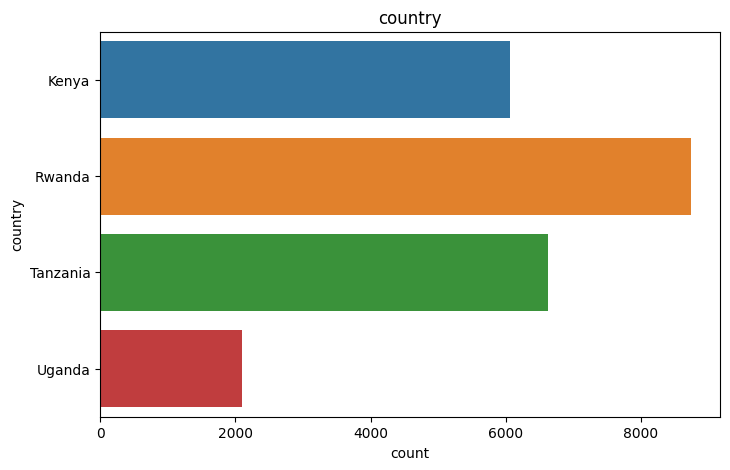

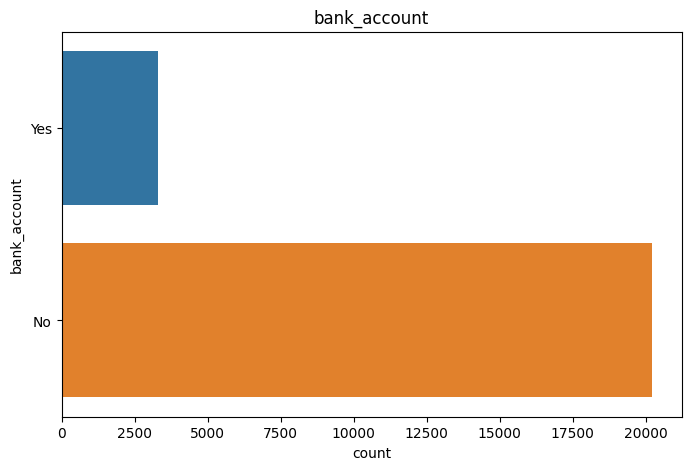

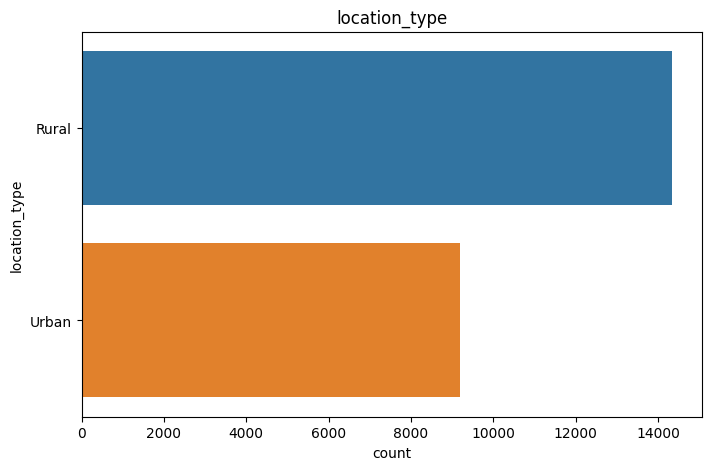

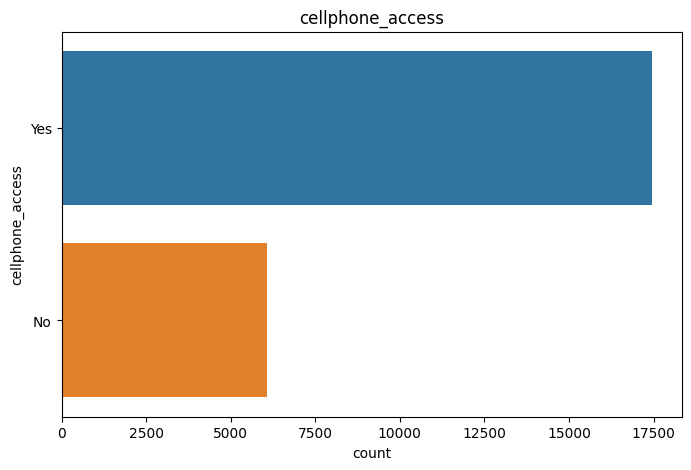

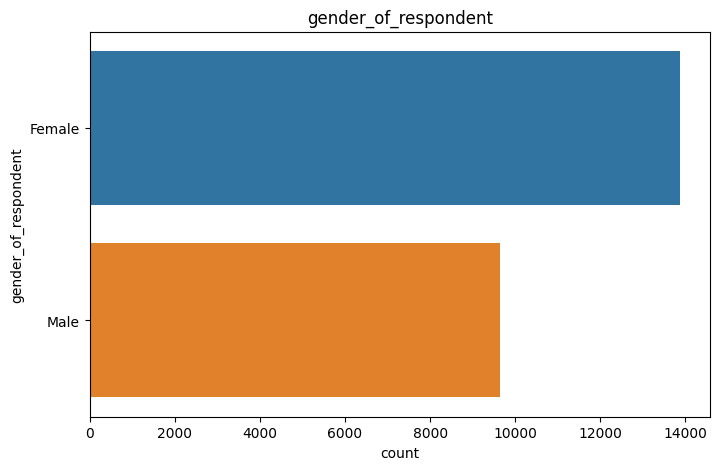

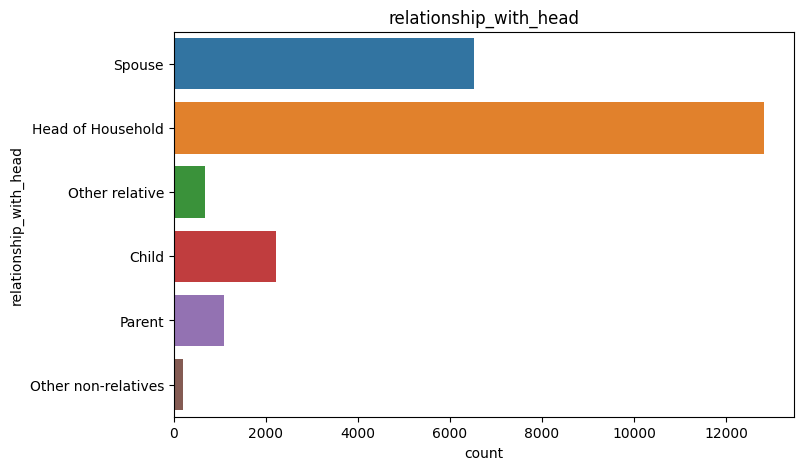

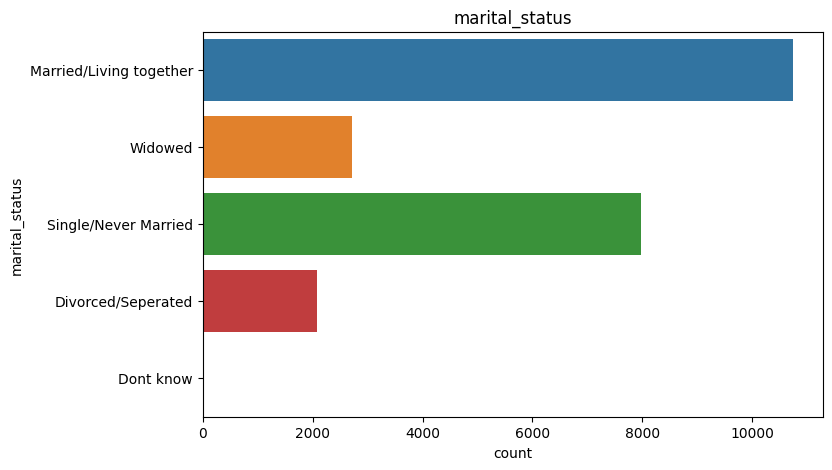

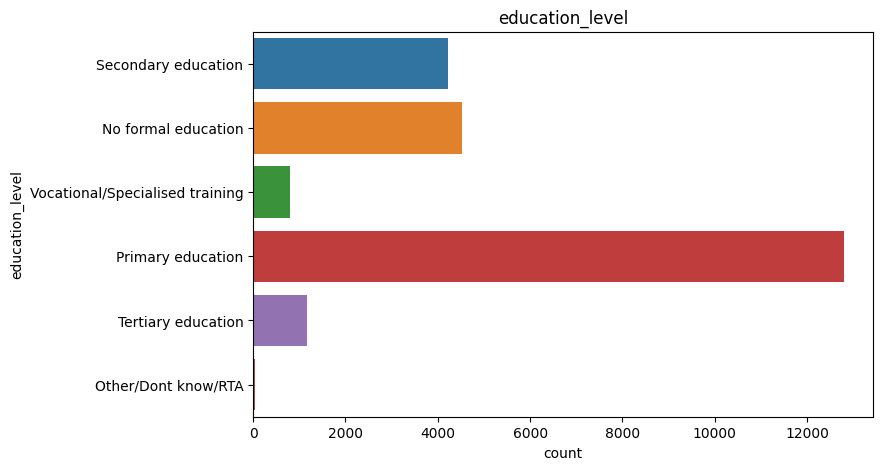

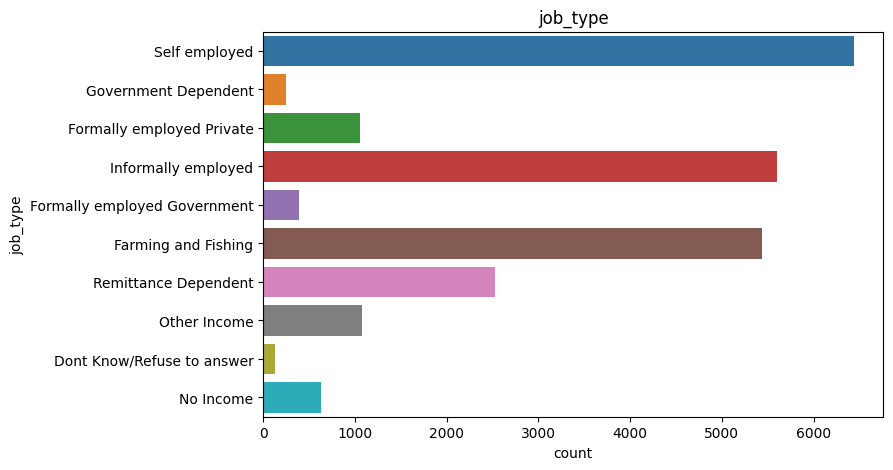

In [21]:
def countplot(df, features):
    for feature in features:
        plt.figure(figsize=(8, 5))
        plt.title(feature)
        sn.countplot(df, y = feature)

countplot(data, cat)

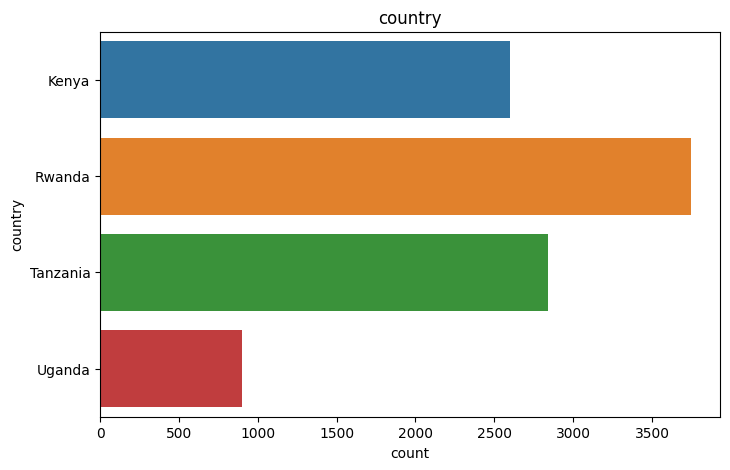

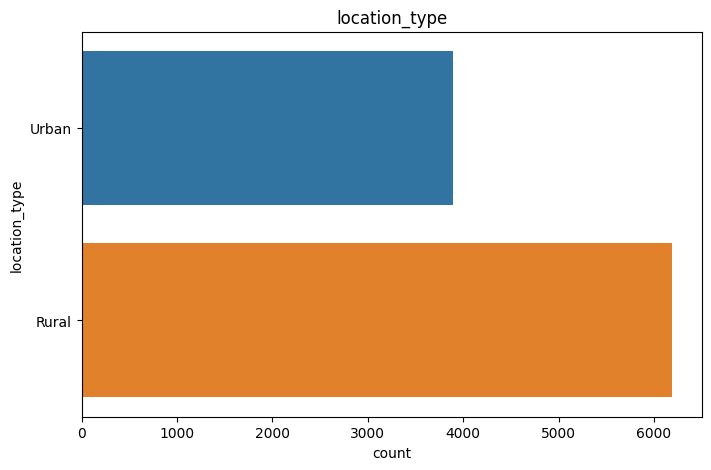

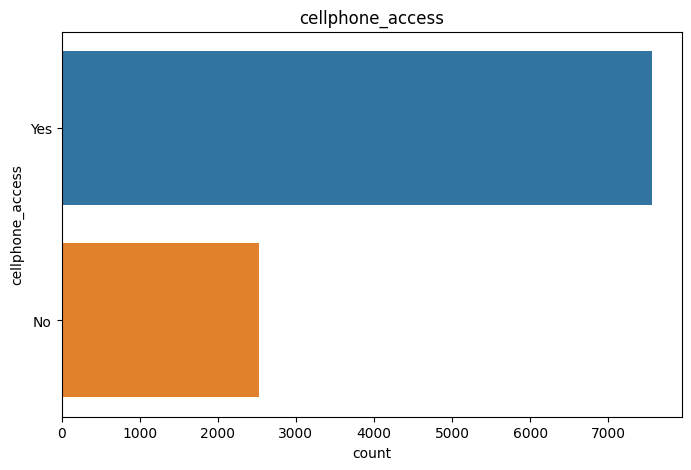

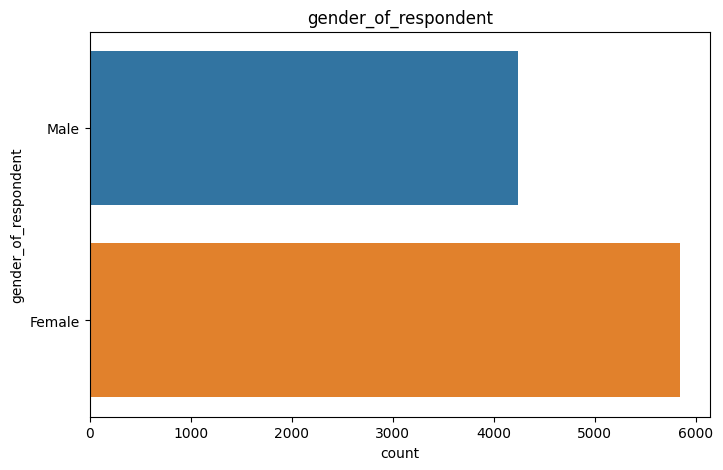

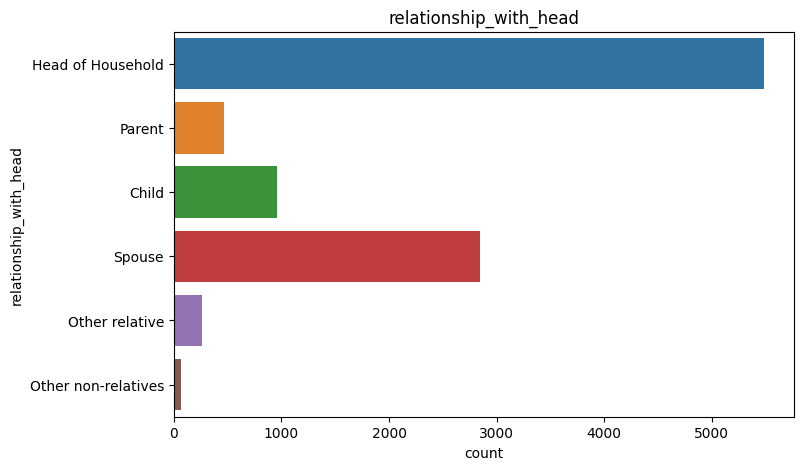

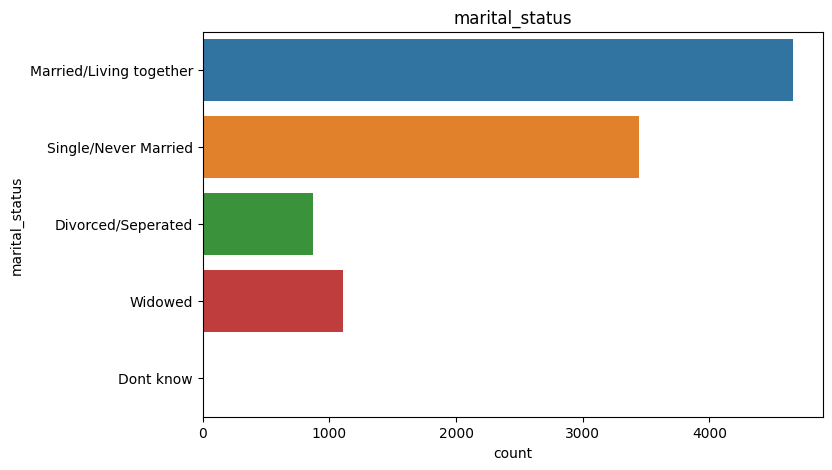

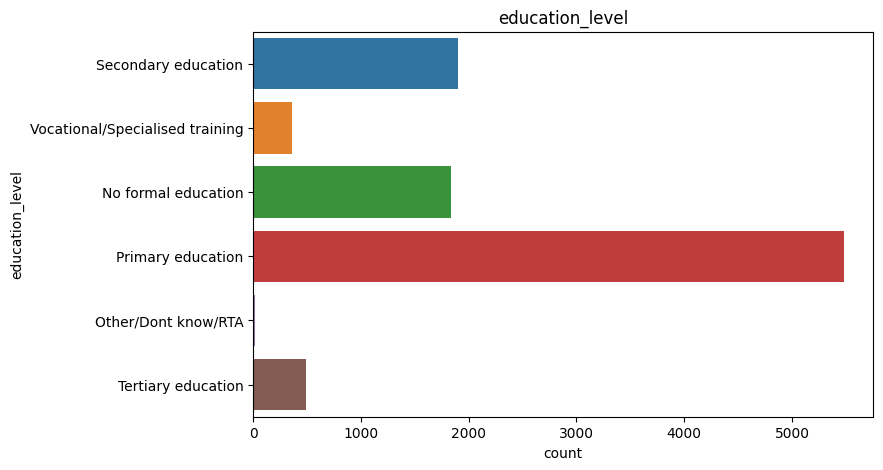

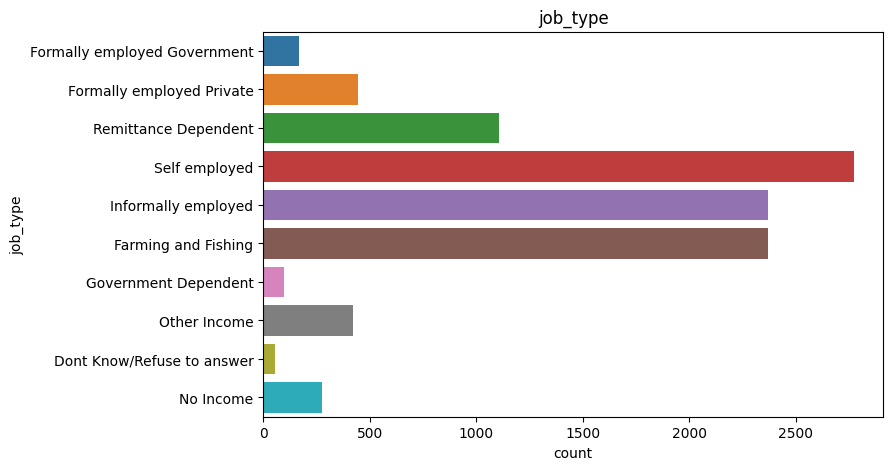

In [22]:
cat_t = test.select_dtypes(include = 'O').columns.to_list() 
countplot(test, cat_t)

In [23]:
data.describe()

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

In [24]:
test.describe()

year  household_size  age_of_respondent
count  10086.000000    10086.000000       10086.000000
mean    2016.975907        3.778802          38.308348
std        0.847356        2.212721          16.270053
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          48.000000
max     2018.000000       20.000000         100.000000

<Axes: title={'center': 'age_of_respondent'}>

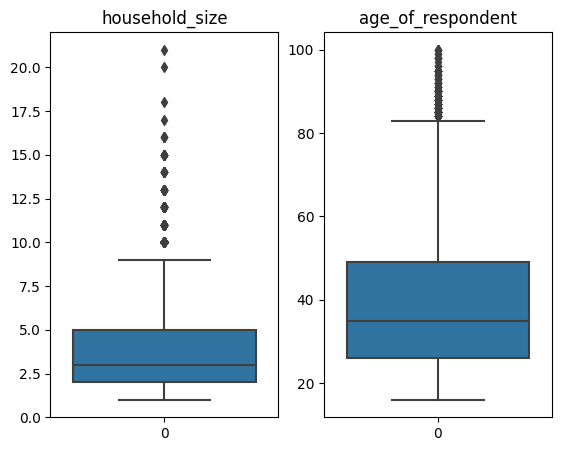

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('household_size')
sn.boxplot(data['household_size'])

plt.subplot(1, 3, 2)
plt.title('age_of_respondent')
sn.boxplot(data['age_of_respondent'])

<Axes: title={'center': 'age_of_respondent'}>

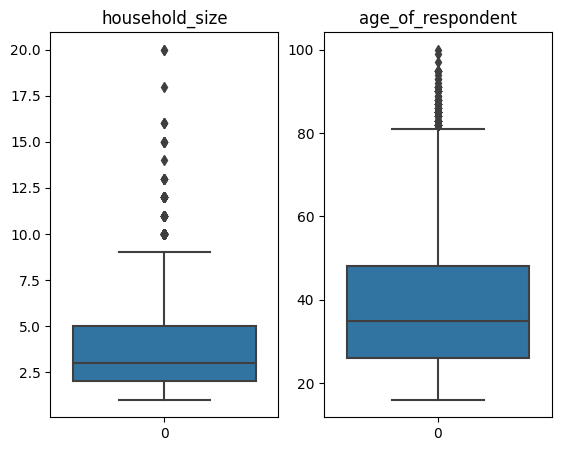

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('household_size')
sn.boxplot(test['household_size'])

plt.subplot(1, 3, 2)
plt.title('age_of_respondent')
sn.boxplot(test['age_of_respondent'])

<Axes: title={'center': 'age_of_respondent'}, xlabel='age_of_respondent', ylabel='Count'>

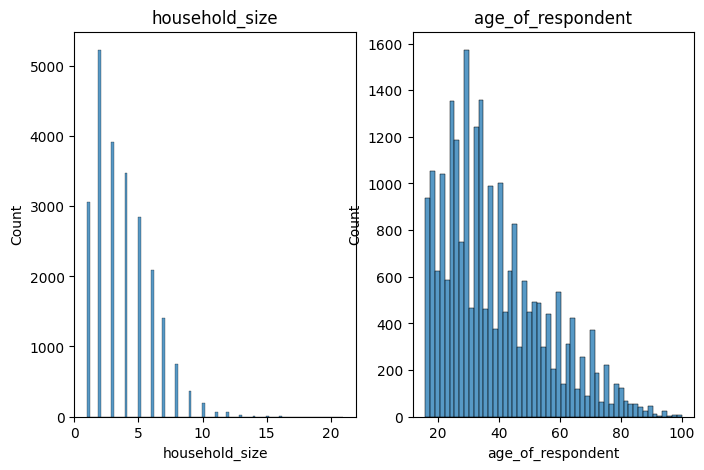

In [27]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('household_size')
sn.histplot(data['household_size'])

plt.subplot(1, 2, 2)
plt.title('age_of_respondent')
sn.histplot(data['age_of_respondent'])

<Axes: title={'center': 'age_of_respondent'}, xlabel='age_of_respondent', ylabel='Count'>

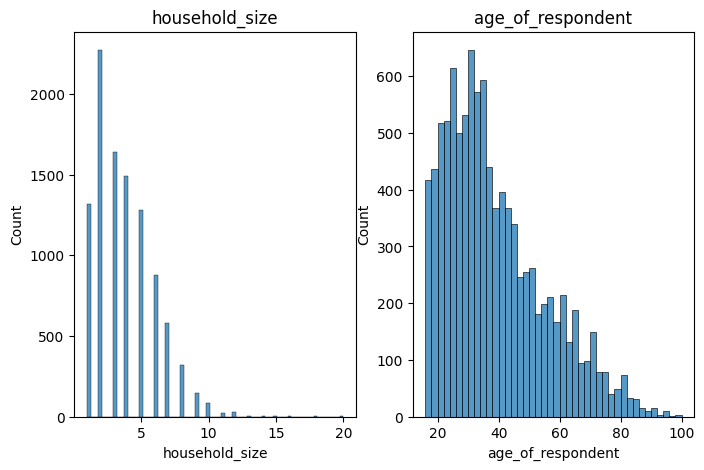

In [28]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('household_size')
sn.histplot(test['household_size'])

plt.subplot(1, 2, 2)
plt.title('age_of_respondent')
sn.histplot(test['age_of_respondent'])

# Fixing outliers

In [29]:
def fixing_outliers(df,feature, low, high):
    lower_limit = np.percentile(df[feature], low)
    print(lower_limit)
    upper_limit = np.percentile(df[feature], high)
    print(upper_limit)

    df[feature] = df[feature].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
    return df
fixing_outliers(data, 'age_of_respondent', 10, 90)
fixing_outliers(data, 'household_size', 10, 90)

20.0
64.0
1.0
7.0


country  year bank_account location_type cellphone_access  \
0       Kenya  2018          Yes         Rural              Yes   
1       Kenya  2018           No         Rural               No   
2       Kenya  2018          Yes         Urban              Yes   
3       Kenya  2018           No         Rural              Yes   
4       Kenya  2018           No         Urban               No   
...       ...   ...          ...           ...              ...   
23519  Uganda  2018           No         Rural              Yes   
23520  Uganda  2018           No         Rural              Yes   
23521  Uganda  2018           No         Rural              Yes   
23522  Uganda  2018           No         Urban              Yes   
23523  Uganda  2018           No         Rural              Yes   

       household_size  age_of_respondent gender_of_respondent  \
0                 3.0               24.0               Female   
1                 5.0               64.0               Female   
2                 5.0               26.0                 Male   
3                 5.0               34.0               Female   
4                 7.0               26.0                 Male   
...               ...                ...                  ...   
23519             4.0               48.0               Female   
23520             2.0               27.0               Female   
23521             5.0               27.0               Female   
23522             7.0               30.0               Female   
23523             7.0               20.0                 Male   

      relationship_with_head           marital_status  \
0                     Spouse  Married/Living together   
1          Head of Household                  Widowed   
2             Other relative     Single/Never Married   
3          Head of Household  Married/Living together   
4                      Child     Single/Never Married   
...                      ...                      ...   
23519      Head of Household       Divorced/Seperated   
23520      Head of Household     Single/Never Married   
23521                 Parent                  Widowed   
23522                 Parent       Divorced/Seperated   
23523                  Child     Single/Never Married   

                       education_level                   job_type  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 12 columns]

In [30]:
fixing_outliers(test, 'household_size', 10, 90)
fixing_outliers(test, 'age_of_respondent', 10, 90)

1.0
7.0
20.0
63.0


country  year location_type cellphone_access  household_size  \
0       Kenya  2018         Urban              Yes             3.0   
1       Kenya  2018         Urban              Yes             7.0   
2       Kenya  2018         Rural               No             3.0   
3       Kenya  2018         Rural               No             6.0   
4       Kenya  2018         Urban               No             3.0   
...       ...   ...           ...              ...             ...   
10081  Uganda  2018         Rural               No             2.0   
10082  Uganda  2018         Urban              Yes             7.0   
10083  Uganda  2018         Urban              Yes             1.0   
10084  Uganda  2018         Rural              Yes             6.0   
10085  Uganda  2018         Urban              Yes             7.0   

       age_of_respondent gender_of_respondent relationship_with_head  \
0                   30.0                 Male      Head of Household   
1                   51.0                 Male      Head of Household   
2                   63.0               Female                 Parent   
3                   39.0               Female      Head of Household   
4                   20.0                 Male                  Child   
...                  ...                  ...                    ...   
10081               62.0               Female                 Spouse   
10082               42.0                 Male      Head of Household   
10083               39.0                 Male      Head of Household   
10084               28.0               Female                 Spouse   
10085               20.0                 Male         Other relative   

                marital_status                  education_level  \
0      Married/Living together              Secondary education   
1      Married/Living together  Vocational/Specialised training   
2      Married/Living together              No formal education   
3      Married/Living together                Primary education   
4         Single/Never Married              Secondary education   
...                        ...                              ...   
10081  Married/Living together                Primary education   
10082  Married/Living together                Primary education   
10083     Single/Never Married              Secondary education   
10084  Married/Living together                Primary education   
10085     Single/Never Married              Secondary education   

                           job_type  
0      Formally employed Government  
1         Formally employed Private  
2              Remittance Dependent  
3              Remittance Dependent  
4              Remittance Dependent  
...                             ...  
10081                 Self employed  
10082                 Self employed  
10083                  Other Income  
10084                 Self employed  
10085                  Other Income  

[10086 rows x 11 columns]

<Axes: title={'center': 'age_of_respondent'}, xlabel='age_of_respondent', ylabel='Count'>

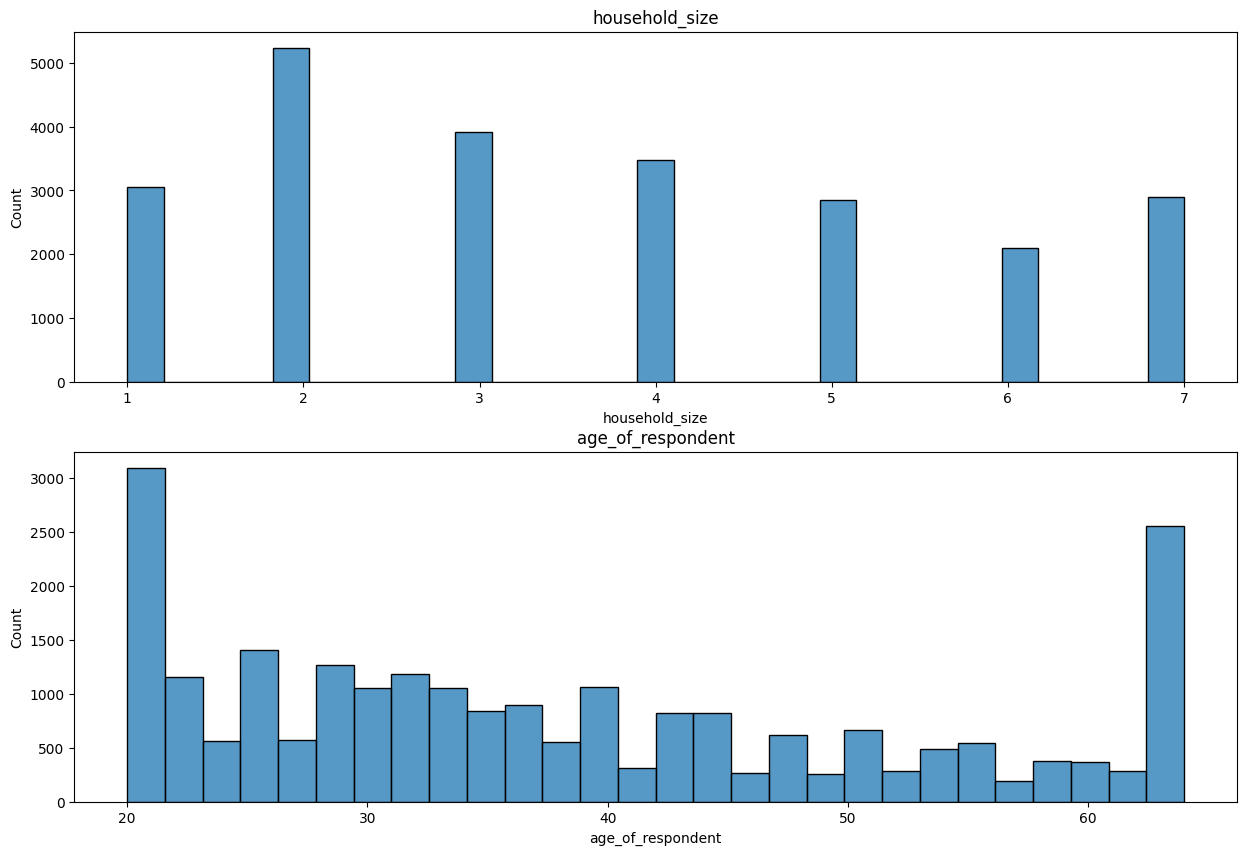

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.title('household_size')
sn.histplot(data['household_size'])

plt.subplot(2, 1, 2)
plt.title('age_of_respondent')
sn.histplot(data['age_of_respondent'])


<Axes: title={'center': 'age_of_respondent'}>

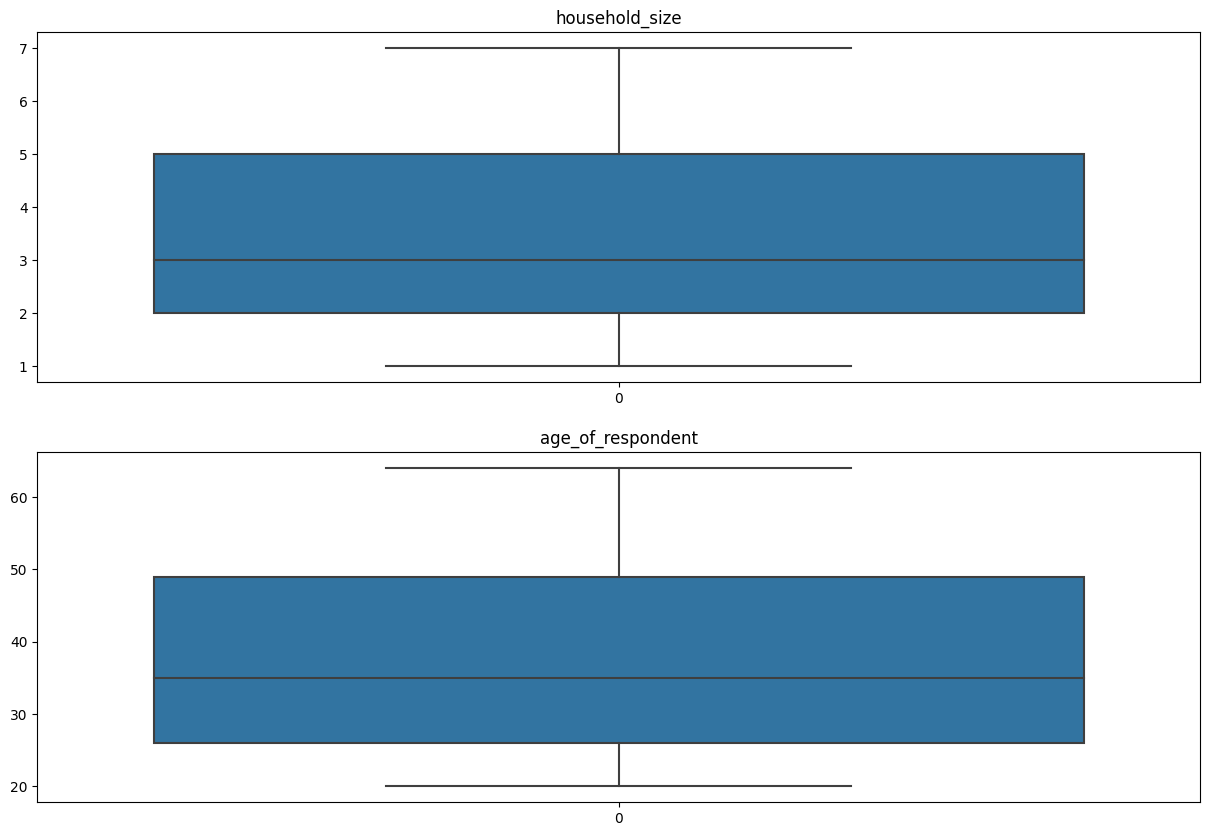

In [32]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.title('household_size')
sn.boxplot(data['household_size'])

plt.subplot(2, 1, 2)
plt.title('age_of_respondent')
sn.boxplot(data['age_of_respondent'])


# Data preprocessing

In [33]:
# Scaling the numerical features in the data
scaler = MinMaxScaler()
def scale(df, features):
    for feature in features:
        df[feature] = scaler.fit_transform(df[[feature]])
        
    return df
        
scale(data, ['household_size', 'age_of_respondent', 'year'])

country  year bank_account location_type cellphone_access  \
0       Kenya   1.0          Yes         Rural              Yes   
1       Kenya   1.0           No         Rural               No   
2       Kenya   1.0          Yes         Urban              Yes   
3       Kenya   1.0           No         Rural              Yes   
4       Kenya   1.0           No         Urban               No   
...       ...   ...          ...           ...              ...   
23519  Uganda   1.0           No         Rural              Yes   
23520  Uganda   1.0           No         Rural              Yes   
23521  Uganda   1.0           No         Rural              Yes   
23522  Uganda   1.0           No         Urban              Yes   
23523  Uganda   1.0           No         Rural              Yes   

       household_size  age_of_respondent gender_of_respondent  \
0            0.333333           0.090909               Female   
1            0.666667           1.000000               Female   
2            0.666667           0.136364                 Male   
3            0.666667           0.318182               Female   
4            1.000000           0.136364                 Male   
...               ...                ...                  ...   
23519        0.500000           0.636364               Female   
23520        0.166667           0.159091               Female   
23521        0.666667           0.159091               Female   
23522        1.000000           0.227273               Female   
23523        1.000000           0.000000                 Male   

      relationship_with_head           marital_status  \
0                     Spouse  Married/Living together   
1          Head of Household                  Widowed   
2             Other relative     Single/Never Married   
3          Head of Household  Married/Living together   
4                      Child     Single/Never Married   
...                      ...                      ...   
23519      Head of Household       Divorced/Seperated   
23520      Head of Household     Single/Never Married   
23521                 Parent                  Widowed   
23522                 Parent       Divorced/Seperated   
23523                  Child     Single/Never Married   

                       education_level                   job_type  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 12 columns]

In [34]:
scale(test,['household_size', 'age_of_respondent', 'year'])

country  year location_type cellphone_access  household_size  \
0       Kenya   1.0         Urban              Yes        0.333333   
1       Kenya   1.0         Urban              Yes        1.000000   
2       Kenya   1.0         Rural               No        0.333333   
3       Kenya   1.0         Rural               No        0.833333   
4       Kenya   1.0         Urban               No        0.333333   
...       ...   ...           ...              ...             ...   
10081  Uganda   1.0         Rural               No        0.166667   
10082  Uganda   1.0         Urban              Yes        1.000000   
10083  Uganda   1.0         Urban              Yes        0.000000   
10084  Uganda   1.0         Rural              Yes        0.833333   
10085  Uganda   1.0         Urban              Yes        1.000000   

       age_of_respondent gender_of_respondent relationship_with_head  \
0               0.232558                 Male      Head of Household   
1               0.720930                 Male      Head of Household   
2               1.000000               Female                 Parent   
3               0.441860               Female      Head of Household   
4               0.000000                 Male                  Child   
...                  ...                  ...                    ...   
10081           0.976744               Female                 Spouse   
10082           0.511628                 Male      Head of Household   
10083           0.441860                 Male      Head of Household   
10084           0.186047               Female                 Spouse   
10085           0.000000                 Male         Other relative   

                marital_status                  education_level  \
0      Married/Living together              Secondary education   
1      Married/Living together  Vocational/Specialised training   
2      Married/Living together              No formal education   
3      Married/Living together                Primary education   
4         Single/Never Married              Secondary education   
...                        ...                              ...   
10081  Married/Living together                Primary education   
10082  Married/Living together                Primary education   
10083     Single/Never Married              Secondary education   
10084  Married/Living together                Primary education   
10085     Single/Never Married              Secondary education   

                           job_type  
0      Formally employed Government  
1         Formally employed Private  
2              Remittance Dependent  
3              Remittance Dependent  
4              Remittance Dependent  
...                             ...  
10081                 Self employed  
10082                 Self employed  
10083                  Other Income  
10084                 Self employed  
10085                  Other Income  

[10086 rows x 11 columns]

<Axes: title={'center': 'age_of_respondent'}, xlabel='age_of_respondent', ylabel='Count'>

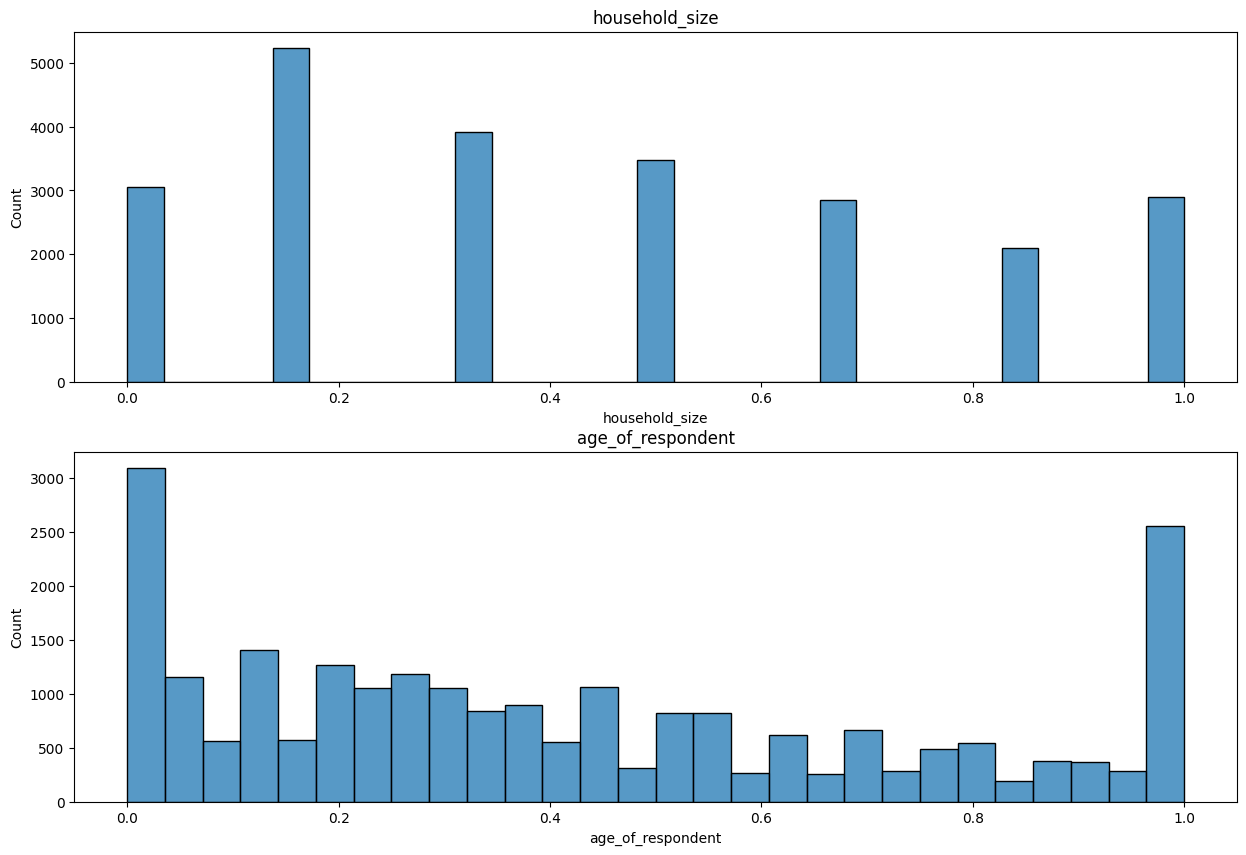

In [35]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.title('household_size')
sn.histplot(data['household_size'])

plt.subplot(2, 1, 2)
plt.title('age_of_respondent')
sn.histplot(data['age_of_respondent'])


## Separating dependent from independent variable

In [36]:
X = data.drop(['bank_account'], axis = 1)
y = data.bank_account

In [37]:
X_cat = X.select_dtypes(include = 'O').columns.to_list()
print(X_cat)

['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


## Encoding

In [38]:
# label encoding
label = LabelEncoder()
def encode(df, features, encode_type):
    if encode_type == 'label':
        for feature in features:
            df[feature] = label.fit_transform(df[feature])
    elif encode_type == 'one_hot':
        for feature in features:
            encoded = pd.get_dummies(df[feature])
            df = pd.concat([df, encoded], axis = 1)
            df.drop(feature, axis = 1, inplace = True)
            
    return df

In [39]:
label_train = [i for i in X_cat if X[i].nunique() <= 3]
one_hot_train = [i for i in X_cat if X[i].nunique() > 3]
print(label_train)
print(one_hot_train)

['location_type', 'cellphone_access', 'gender_of_respondent']
['country', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


In [40]:
# the train data encoding
encode(X, label_train, 'label')
X

country  year  location_type  cellphone_access  household_size  \
0       Kenya   1.0              0                 1        0.333333   
1       Kenya   1.0              0                 0        0.666667   
2       Kenya   1.0              1                 1        0.666667   
3       Kenya   1.0              0                 1        0.666667   
4       Kenya   1.0              1                 0        1.000000   
...       ...   ...            ...               ...             ...   
23519  Uganda   1.0              0                 1        0.500000   
23520  Uganda   1.0              0                 1        0.166667   
23521  Uganda   1.0              0                 1        0.666667   
23522  Uganda   1.0              1                 1        1.000000   
23523  Uganda   1.0              0                 1        1.000000   

       age_of_respondent  gender_of_respondent relationship_with_head  \
0               0.090909                     0                 Spouse   
1               1.000000                     0      Head of Household   
2               0.136364                     1         Other relative   
3               0.318182                     0      Head of Household   
4               0.136364                     1                  Child   
...                  ...                   ...                    ...   
23519           0.636364                     0      Head of Household   
23520           0.159091                     0      Head of Household   
23521           0.159091                     0                 Parent   
23522           0.227273                     0                 Parent   
23523           0.000000                     1                  Child   

                marital_status                  education_level  \
0      Married/Living together              Secondary education   
1                      Widowed              No formal education   
2         Single/Never Married  Vocational/Specialised training   
3      Married/Living together                Primary education   
4         Single/Never Married                Primary education   
...                        ...                              ...   
23519       Divorced/Seperated              No formal education   
23520     Single/Never Married              Secondary education   
23521                  Widowed                Primary education   
23522       Divorced/Seperated              Secondary education   
23523     Single/Never Married              Secondary education   

                        job_type  
0                  Self employed  
1           Government Dependent  
2                  Self employed  
3      Formally employed Private  
4            Informally employed  
...                          ...  
23519               Other Income  
23520               Other Income  
23521               Other Income  
23522              Self employed  
23523                  No Income  

[23524 rows x 11 columns]

In [41]:
X = encode(X, one_hot_train, 'one_hot')

In [42]:
X

year  location_type  cellphone_access  household_size  \
0       1.0              0                 1        0.333333   
1       1.0              0                 0        0.666667   
2       1.0              1                 1        0.666667   
3       1.0              0                 1        0.666667   
4       1.0              1                 0        1.000000   
...     ...            ...               ...             ...   
23519   1.0              0                 1        0.500000   
23520   1.0              0                 1        0.166667   
23521   1.0              0                 1        0.666667   
23522   1.0              1                 1        1.000000   
23523   1.0              0                 1        1.000000   

       age_of_respondent  gender_of_respondent  Kenya  Rwanda  Tanzania  \
0               0.090909                     0   True   False     False   
1               1.000000                     0   True   False     False   
2               0.136364                     1   True   False     False   
3               0.318182                     0   True   False     False   
4               0.136364                     1   True   False     False   
...                  ...                   ...    ...     ...       ...   
23519           0.636364                     0  False   False     False   
23520           0.159091                     0  False   False     False   
23521           0.159091                     0  False   False     False   
23522           0.227273                     0  False   False     False   
23523           0.000000                     1  False   False     False   

       Uganda  ...  Dont Know/Refuse to answer  Farming and Fishing  \
0       False  ...                       False                False   
1       False  ...                       False                False   
2       False  ...                       False                False   
3       False  ...                       False                False   
4       False  ...                       False                False   
...       ...  ...                         ...                  ...   
23519    True  ...                       False                False   
23520    True  ...                       False                False   
23521    True  ...                       False                False   
23522    True  ...                       False                False   
23523    True  ...                       False                False   

       Formally employed Government  Formally employed Private  \
0                             False                      False   
1                             False                      False   
2                             False                      False   
3                             False                       True   
4                             False                      False   
...                             ...                        ...   
23519                         False                      False   
23520                         False                      False   
23521                         False                      False   
23522                         False                      False   
23523                         False                      False   

       Government Dependent  Informally employed  No Income  Other Income  \
0                     False                False      False         False   
1                      True                False      False         False   
2                     False                False      False         False   
3                     False                False      False         False   
4                     False                 True      False         False   
...                     ...                  ...        ...           ...   
23519                 False                False      False          True   
23520                 False                False      False          True  

In [43]:
# the test data encoding
test = encode(test, label_train, 'label')
test = encode(test, one_hot_train, 'one_hot')

In [44]:
y = label.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [45]:
test

year  location_type  cellphone_access  household_size  \
0       1.0              1                 1        0.333333   
1       1.0              1                 1        1.000000   
2       1.0              0                 0        0.333333   
3       1.0              0                 0        0.833333   
4       1.0              1                 0        0.333333   
...     ...            ...               ...             ...   
10081   1.0              0                 0        0.166667   
10082   1.0              1                 1        1.000000   
10083   1.0              1                 1        0.000000   
10084   1.0              0                 1        0.833333   
10085   1.0              1                 1        1.000000   

       age_of_respondent  gender_of_respondent  Kenya  Rwanda  Tanzania  \
0               0.232558                     1   True   False     False   
1               0.720930                     1   True   False     False   
2               1.000000                     0   True   False     False   
3               0.441860                     0   True   False     False   
4               0.000000                     1   True   False     False   
...                  ...                   ...    ...     ...       ...   
10081           0.976744                     0  False   False     False   
10082           0.511628                     1  False   False     False   
10083           0.441860                     1  False   False     False   
10084           0.186047                     0  False   False     False   
10085           0.000000                     1  False   False     False   

       Uganda  ...  Dont Know/Refuse to answer  Farming and Fishing  \
0       False  ...                       False                False   
1       False  ...                       False                False   
2       False  ...                       False                False   
3       False  ...                       False                False   
4       False  ...                       False                False   
...       ...  ...                         ...                  ...   
10081    True  ...                       False                False   
10082    True  ...                       False                False   
10083    True  ...                       False                False   
10084    True  ...                       False                False   
10085    True  ...                       False                False   

       Formally employed Government  Formally employed Private  \
0                              True                      False   
1                             False                       True   
2                             False                      False   
3                             False                      False   
4                             False                      False   
...                             ...                        ...   
10081                         False                      False   
10082                         False                      False   
10083                         False                      False   
10084                         False                      False   
10085                         False                      False   

       Government Dependent  Informally employed  No Income  Other Income  \
0                     False                False      False         False   
1                     False                False      False         False   
2                     False                False      False         False   
3                     False                False      False         False   
4                     False                False      False         False   
...                     ...                  ...        ...           ...   
10081                 False                False      False         False   
10082                 False                False      False         False  

In [46]:
plt.figure(figsize=(40, 30), dpi = 400)
sn.heatmap(X.corr(), annot = True, cmap='coolwarm')

<Axes: >

## splitting the data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [48]:
X_train.dtypes

year                               float64
location_type                        int32
cellphone_access                     int32
household_size                     float64
age_of_respondent                  float64
gender_of_respondent                 int32
Kenya                                 bool
Rwanda                                bool
Tanzania                              bool
Uganda                                bool
Child                                 bool
Head of Household                     bool
Other non-relatives                   bool
Other relative                        bool
Parent                                bool
Spouse                                bool
Divorced/Seperated                    bool
Dont know                             bool
Married/Living together               bool
Single/Never Married                  bool
Widowed                               bool
No formal education                   bool
Other/Dont know/RTA                   bool
Primary edu

In [49]:
# feature selection

selector = SelectPercentile(score_func=f_classif, percentile=20)  # Select top 20% features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Baseline model

In [50]:
def model(model, x_train, target_train, x_test):
    model.fit(x_train, target_train)
    result = model.predict(x_test)

    print(accuracy_score(y_test, result))
    print()
    print(precision_score(y_test, result))
    print()
    print(recall_score(y_test, result))
    print()
    print(f1_score(y_test, result))
    print()
    print(confusion_matrix(y_test, result))
    print()
    print(classification_report(y_test, result))
    print()

In [51]:
model(LogisticRegression(class_weight={0: 0.1, 1:0.9 }), X_train_selected, y_train, X_test_selected)

0.720297555791711

0.29891304347826086

0.7615384615384615

0.4293148308759757

[[2894 1161]
 [ 155  495]]

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      4055
           1       0.30      0.76      0.43       650

    accuracy                           0.72      4705
   macro avg       0.62      0.74      0.62      4705
weighted avg       0.86      0.72      0.76      4705




In [52]:
model(LogisticRegression(), X_train_selected, y_train, X_test_selected)

0.8869287991498406

0.7006802721088435

0.3169230769230769

0.4364406779661017

[[3967   88]
 [ 444  206]]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4055
           1       0.70      0.32      0.44       650

    accuracy                           0.89      4705
   macro avg       0.80      0.65      0.69      4705
weighted avg       0.87      0.89      0.87      4705




In [147]:
# Logistic regression model
model(LogisticRegression(), X_train, y_train)

0.8860786397449522

0.7016574585635359

0.3724340175953079

0.4865900383141762

[[3915  108]
 [ 428  254]]

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4023
           1       0.70      0.37      0.49       682

    accuracy                           0.89      4705
   macro avg       0.80      0.67      0.71      4705
weighted avg       0.87      0.89      0.87      4705




C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
model(RandomForestClassifier(class_weight={0: 0.1, 1:0.9 }), X_train, y_train, X_test)

0.8465462274176409

0.4407894736842105

0.4123076923076923

0.42607313195548485

[[3715  340]
 [ 382  268]]

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4055
           1       0.44      0.41      0.43       650

    accuracy                           0.85      4705
   macro avg       0.67      0.66      0.67      4705
weighted avg       0.84      0.85      0.84      4705




In [148]:
model(RandomForestClassifier(), X_train, y_train)

0.8737513283740701

0.6004566210045662

0.38563049853372433

0.46964285714285714

[[3848  175]
 [ 419  263]]

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4023
           1       0.60      0.39      0.47       682

    accuracy                           0.87      4705
   macro avg       0.75      0.67      0.70      4705
weighted avg       0.86      0.87      0.86      4705




In [149]:
model(XGBClassifier(objective = 'binary:logistic'),  X_train, y_train)

0.8835281615302869

0.6709183673469388

0.38563049853372433

0.48975791433891996

[[3894  129]
 [ 419  263]]

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4023
           1       0.67      0.39      0.49       682

    accuracy                           0.88      4705
   macro avg       0.79      0.68      0.71      4705
weighted avg       0.87      0.88      0.87      4705




In [150]:
model(CatBoostClassifier(),  X_train, y_train)

Learning rate set to 0.036073
0:	learn: 0.6617535	total: 2.93s	remaining: 48m 51s
1:	learn: 0.6317711	total: 2.95s	remaining: 24m 31s
2:	learn: 0.6048434	total: 2.97s	remaining: 16m 26s
3:	learn: 0.5772495	total: 2.98s	remaining: 12m 22s
4:	learn: 0.5548617	total: 3s	remaining: 9m 56s
5:	learn: 0.5319734	total: 3.01s	remaining: 8m 18s
6:	learn: 0.5151796	total: 3.03s	remaining: 7m 10s
7:	learn: 0.4998255	total: 3.05s	remaining: 6m 18s
8:	learn: 0.4815149	total: 3.07s	remaining: 5m 37s
9:	learn: 0.4691612	total: 3.09s	remaining: 5m 6s
10:	learn: 0.4551532	total: 3.12s	remaining: 4m 40s
11:	learn: 0.4427050	total: 3.14s	remaining: 4m 18s
12:	learn: 0.4325587	total: 3.17s	remaining: 4m
13:	learn: 0.4218666	total: 3.19s	remaining: 3m 44s
14:	learn: 0.4113211	total: 3.21s	remaining: 3m 31s
15:	learn: 0.4030582	total: 3.23s	remaining: 3m 18s
16:	learn: 0.3937145	total: 3.25s	remaining: 3m 8s
17:	learn: 0.3867899	total: 3.28s	remaining: 2m 59s
18:	learn: 0.3810581	total: 3.31s	remaining: 2m 5

164:	learn: 0.2704917	total: 6.78s	remaining: 34.3s
165:	learn: 0.2704376	total: 6.8s	remaining: 34.2s
166:	learn: 0.2703719	total: 6.83s	remaining: 34.1s
167:	learn: 0.2702864	total: 6.85s	remaining: 33.9s
168:	learn: 0.2701714	total: 6.87s	remaining: 33.8s
169:	learn: 0.2701089	total: 6.88s	remaining: 33.6s
170:	learn: 0.2700002	total: 6.9s	remaining: 33.4s
171:	learn: 0.2699161	total: 6.91s	remaining: 33.3s
172:	learn: 0.2698096	total: 6.93s	remaining: 33.1s
173:	learn: 0.2697087	total: 6.95s	remaining: 33s
174:	learn: 0.2696522	total: 6.98s	remaining: 32.9s
175:	learn: 0.2695799	total: 7.04s	remaining: 33s
176:	learn: 0.2695202	total: 7.07s	remaining: 32.9s
177:	learn: 0.2694693	total: 7.11s	remaining: 32.8s
178:	learn: 0.2694279	total: 7.13s	remaining: 32.7s
179:	learn: 0.2693746	total: 7.15s	remaining: 32.6s
180:	learn: 0.2693129	total: 7.16s	remaining: 32.4s
181:	learn: 0.2691827	total: 7.18s	remaining: 32.3s
182:	learn: 0.2691100	total: 7.2s	remaining: 32.1s
183:	learn: 0.26899

325:	learn: 0.2606369	total: 11.2s	remaining: 23.1s
326:	learn: 0.2606098	total: 11.3s	remaining: 23.3s
327:	learn: 0.2605722	total: 11.4s	remaining: 23.3s
328:	learn: 0.2605112	total: 11.5s	remaining: 23.4s
329:	learn: 0.2604676	total: 11.5s	remaining: 23.3s
330:	learn: 0.2604228	total: 11.5s	remaining: 23.2s
331:	learn: 0.2603881	total: 11.5s	remaining: 23.1s
332:	learn: 0.2603204	total: 11.5s	remaining: 23.1s
333:	learn: 0.2602358	total: 11.5s	remaining: 23s
334:	learn: 0.2601739	total: 11.5s	remaining: 22.9s
335:	learn: 0.2601331	total: 11.6s	remaining: 22.8s
336:	learn: 0.2601022	total: 11.6s	remaining: 22.8s
337:	learn: 0.2600320	total: 11.6s	remaining: 22.7s
338:	learn: 0.2600042	total: 11.6s	remaining: 22.6s
339:	learn: 0.2599531	total: 11.6s	remaining: 22.5s
340:	learn: 0.2599149	total: 11.6s	remaining: 22.5s
341:	learn: 0.2598676	total: 11.6s	remaining: 22.4s
342:	learn: 0.2598277	total: 11.7s	remaining: 22.3s
343:	learn: 0.2597637	total: 11.7s	remaining: 22.3s
344:	learn: 0.

491:	learn: 0.2537135	total: 15.8s	remaining: 16.4s
492:	learn: 0.2536887	total: 15.9s	remaining: 16.3s
493:	learn: 0.2536572	total: 15.9s	remaining: 16.3s
494:	learn: 0.2536265	total: 15.9s	remaining: 16.2s
495:	learn: 0.2535655	total: 15.9s	remaining: 16.2s
496:	learn: 0.2535096	total: 16s	remaining: 16.1s
497:	learn: 0.2534741	total: 16s	remaining: 16.1s
498:	learn: 0.2534449	total: 16s	remaining: 16.1s
499:	learn: 0.2534078	total: 16s	remaining: 16s
500:	learn: 0.2533768	total: 16s	remaining: 16s
501:	learn: 0.2533413	total: 16s	remaining: 15.9s
502:	learn: 0.2533145	total: 16.1s	remaining: 15.9s
503:	learn: 0.2532547	total: 16.1s	remaining: 15.8s
504:	learn: 0.2532239	total: 16.1s	remaining: 15.8s
505:	learn: 0.2531620	total: 16.1s	remaining: 15.7s
506:	learn: 0.2531258	total: 16.1s	remaining: 15.7s
507:	learn: 0.2530983	total: 16.1s	remaining: 15.6s
508:	learn: 0.2530408	total: 16.1s	remaining: 15.6s
509:	learn: 0.2529918	total: 16.2s	remaining: 15.6s
510:	learn: 0.2529598	total:

663:	learn: 0.2482599	total: 19.1s	remaining: 9.64s
664:	learn: 0.2482348	total: 19.1s	remaining: 9.62s
665:	learn: 0.2482146	total: 19.1s	remaining: 9.58s
666:	learn: 0.2481956	total: 19.1s	remaining: 9.55s
667:	learn: 0.2481560	total: 19.2s	remaining: 9.53s
668:	learn: 0.2481321	total: 19.2s	remaining: 9.52s
669:	learn: 0.2481098	total: 19.3s	remaining: 9.49s
670:	learn: 0.2480858	total: 19.3s	remaining: 9.46s
671:	learn: 0.2480626	total: 19.3s	remaining: 9.43s
672:	learn: 0.2480314	total: 19.3s	remaining: 9.39s
673:	learn: 0.2480124	total: 19.3s	remaining: 9.35s
674:	learn: 0.2479861	total: 19.4s	remaining: 9.32s
675:	learn: 0.2479573	total: 19.4s	remaining: 9.28s
676:	learn: 0.2479196	total: 19.4s	remaining: 9.25s
677:	learn: 0.2478902	total: 19.4s	remaining: 9.21s
678:	learn: 0.2478796	total: 19.4s	remaining: 9.18s
679:	learn: 0.2478695	total: 19.4s	remaining: 9.14s
680:	learn: 0.2478481	total: 19.4s	remaining: 9.1s
681:	learn: 0.2478060	total: 19.5s	remaining: 9.07s
682:	learn: 0

829:	learn: 0.2439462	total: 21.9s	remaining: 4.48s
830:	learn: 0.2439326	total: 21.9s	remaining: 4.45s
831:	learn: 0.2438987	total: 21.9s	remaining: 4.42s
832:	learn: 0.2438850	total: 21.9s	remaining: 4.4s
833:	learn: 0.2438566	total: 22s	remaining: 4.37s
834:	learn: 0.2438407	total: 22s	remaining: 4.34s
835:	learn: 0.2438172	total: 22s	remaining: 4.31s
836:	learn: 0.2437725	total: 22s	remaining: 4.29s
837:	learn: 0.2437589	total: 22s	remaining: 4.26s
838:	learn: 0.2437418	total: 22s	remaining: 4.23s
839:	learn: 0.2437275	total: 22.1s	remaining: 4.2s
840:	learn: 0.2436724	total: 22.1s	remaining: 4.17s
841:	learn: 0.2436530	total: 22.1s	remaining: 4.14s
842:	learn: 0.2436249	total: 22.1s	remaining: 4.12s
843:	learn: 0.2436101	total: 22.1s	remaining: 4.09s
844:	learn: 0.2435881	total: 22.1s	remaining: 4.06s
845:	learn: 0.2435694	total: 22.1s	remaining: 4.03s
846:	learn: 0.2435523	total: 22.2s	remaining: 4s
847:	learn: 0.2435405	total: 22.2s	remaining: 3.98s
848:	learn: 0.2435021	total: 

0.8850159404888417

0.6812339331619537

0.3885630498533724

0.49486461251167124

[[3899  124]
 [ 417  265]]

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4023
           1       0.68      0.39      0.49       682

    accuracy                           0.89      4705
   macro avg       0.79      0.68      0.71      4705
weighted avg       0.87      0.89      0.87      4705




def objective(trial):
    # define parameters
    
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-5, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100)
    }
    
    
    model = CatBoostClassifier(**params, verbose = 0, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction = 'maximize')
study.optimize(objective)

# further preprocessing

## Resampling

In [157]:
smote = SMOTE(random_state = 7)
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [158]:
X_resample.shape

(32320, 37)

In [159]:
y_resample.shape

(32320,)

# improving the model

In [160]:
model(LogisticRegression(), X_resample, y_resample)

0.820403825717322

0.4147424511545293

0.7151607963246555

0.5250140528386734

[[3393  659]
 [ 186  467]]

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      4052
           1       0.41      0.72      0.53       653

    accuracy                           0.82      4705
   macro avg       0.68      0.78      0.71      4705
weighted avg       0.87      0.82      0.84      4705




C:\Users\Gbanjubola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [161]:
model(RandomForestClassifier(), X_resample, y_resample)

0.8497343251859724

0.4634146341463415

0.5237366003062787

0.49173256649892166

[[3656  396]
 [ 311  342]]

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4052
           1       0.46      0.52      0.49       653

    accuracy                           0.85      4705
   macro avg       0.69      0.71      0.70      4705
weighted avg       0.86      0.85      0.85      4705




In [162]:
model(XGBClassifier(), X_resample, y_resample)

0.8852284803400637

0.6310904872389791

0.4165390505359878

0.5018450184501845

[[3893  159]
 [ 381  272]]

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4052
           1       0.63      0.42      0.50       653

    accuracy                           0.89      4705
   macro avg       0.77      0.69      0.72      4705
weighted avg       0.87      0.89      0.88      4705




In [163]:
model(CatBoostClassifier(), X_resample, y_resample)

Learning rate set to 0.045444
0:	learn: 0.6719434	total: 93.3ms	remaining: 1m 33s
1:	learn: 0.6529465	total: 124ms	remaining: 1m 2s
2:	learn: 0.6349099	total: 165ms	remaining: 54.8s
3:	learn: 0.6189285	total: 188ms	remaining: 46.9s
4:	learn: 0.6048507	total: 211ms	remaining: 42.1s
5:	learn: 0.5925795	total: 234ms	remaining: 38.8s
6:	learn: 0.5807889	total: 257ms	remaining: 36.5s
7:	learn: 0.5709925	total: 281ms	remaining: 34.8s
8:	learn: 0.5612716	total: 305ms	remaining: 33.5s
9:	learn: 0.5524525	total: 331ms	remaining: 32.8s
10:	learn: 0.5445277	total: 355ms	remaining: 31.9s
11:	learn: 0.5375216	total: 381ms	remaining: 31.4s
12:	learn: 0.5304151	total: 407ms	remaining: 30.9s
13:	learn: 0.5243216	total: 430ms	remaining: 30.3s
14:	learn: 0.5173642	total: 454ms	remaining: 29.8s
15:	learn: 0.5130909	total: 483ms	remaining: 29.7s
16:	learn: 0.5089027	total: 507ms	remaining: 29.3s
17:	learn: 0.5044684	total: 531ms	remaining: 29s
18:	learn: 0.4997441	total: 555ms	remaining: 28.6s
19:	learn: 

167:	learn: 0.2869264	total: 4.79s	remaining: 23.7s
168:	learn: 0.2864086	total: 4.82s	remaining: 23.7s
169:	learn: 0.2862097	total: 4.84s	remaining: 23.6s
170:	learn: 0.2857036	total: 4.87s	remaining: 23.6s
171:	learn: 0.2854396	total: 4.89s	remaining: 23.5s
172:	learn: 0.2852038	total: 4.92s	remaining: 23.5s
173:	learn: 0.2849572	total: 4.94s	remaining: 23.4s
174:	learn: 0.2847142	total: 4.96s	remaining: 23.4s
175:	learn: 0.2843686	total: 4.99s	remaining: 23.4s
176:	learn: 0.2830830	total: 5.01s	remaining: 23.3s
177:	learn: 0.2820201	total: 5.04s	remaining: 23.3s
178:	learn: 0.2818123	total: 5.07s	remaining: 23.3s
179:	learn: 0.2816523	total: 5.1s	remaining: 23.2s
180:	learn: 0.2810727	total: 5.12s	remaining: 23.2s
181:	learn: 0.2808208	total: 5.15s	remaining: 23.1s
182:	learn: 0.2806495	total: 5.17s	remaining: 23.1s
183:	learn: 0.2803076	total: 5.2s	remaining: 23.1s
184:	learn: 0.2800480	total: 5.23s	remaining: 23s
185:	learn: 0.2793777	total: 5.26s	remaining: 23s
186:	learn: 0.2790

332:	learn: 0.2306334	total: 9.09s	remaining: 18.2s
333:	learn: 0.2305676	total: 9.12s	remaining: 18.2s
334:	learn: 0.2299416	total: 9.15s	remaining: 18.2s
335:	learn: 0.2298333	total: 9.17s	remaining: 18.1s
336:	learn: 0.2293368	total: 9.19s	remaining: 18.1s
337:	learn: 0.2290333	total: 9.22s	remaining: 18.1s
338:	learn: 0.2285262	total: 9.24s	remaining: 18s
339:	learn: 0.2280770	total: 9.27s	remaining: 18s
340:	learn: 0.2276222	total: 9.29s	remaining: 18s
341:	learn: 0.2271891	total: 9.32s	remaining: 17.9s
342:	learn: 0.2266510	total: 9.35s	remaining: 17.9s
343:	learn: 0.2264920	total: 9.37s	remaining: 17.9s
344:	learn: 0.2261514	total: 9.39s	remaining: 17.8s
345:	learn: 0.2260035	total: 9.42s	remaining: 17.8s
346:	learn: 0.2258367	total: 9.44s	remaining: 17.8s
347:	learn: 0.2257131	total: 9.46s	remaining: 17.7s
348:	learn: 0.2252539	total: 9.48s	remaining: 17.7s
349:	learn: 0.2247719	total: 9.51s	remaining: 17.7s
350:	learn: 0.2242641	total: 9.55s	remaining: 17.7s
351:	learn: 0.2239

495:	learn: 0.1991334	total: 13.3s	remaining: 13.5s
496:	learn: 0.1990849	total: 13.3s	remaining: 13.5s
497:	learn: 0.1989001	total: 13.4s	remaining: 13.5s
498:	learn: 0.1987582	total: 13.4s	remaining: 13.4s
499:	learn: 0.1986179	total: 13.4s	remaining: 13.4s
500:	learn: 0.1985369	total: 13.4s	remaining: 13.4s
501:	learn: 0.1983656	total: 13.5s	remaining: 13.4s
502:	learn: 0.1982854	total: 13.5s	remaining: 13.3s
503:	learn: 0.1981364	total: 13.5s	remaining: 13.3s
504:	learn: 0.1979598	total: 13.5s	remaining: 13.3s
505:	learn: 0.1978480	total: 13.6s	remaining: 13.2s
506:	learn: 0.1977853	total: 13.6s	remaining: 13.2s
507:	learn: 0.1976658	total: 13.6s	remaining: 13.2s
508:	learn: 0.1975627	total: 13.6s	remaining: 13.2s
509:	learn: 0.1975054	total: 13.7s	remaining: 13.1s
510:	learn: 0.1974571	total: 13.7s	remaining: 13.1s
511:	learn: 0.1971669	total: 13.7s	remaining: 13.1s
512:	learn: 0.1970420	total: 13.7s	remaining: 13s
513:	learn: 0.1969489	total: 13.8s	remaining: 13s
514:	learn: 0.19

656:	learn: 0.1833300	total: 17.5s	remaining: 9.14s
657:	learn: 0.1832557	total: 17.5s	remaining: 9.12s
658:	learn: 0.1831777	total: 17.6s	remaining: 9.09s
659:	learn: 0.1831052	total: 17.6s	remaining: 9.06s
660:	learn: 0.1830609	total: 17.6s	remaining: 9.03s
661:	learn: 0.1829743	total: 17.6s	remaining: 9.01s
662:	learn: 0.1829262	total: 17.7s	remaining: 8.98s
663:	learn: 0.1828877	total: 17.7s	remaining: 8.95s
664:	learn: 0.1828177	total: 17.7s	remaining: 8.93s
665:	learn: 0.1827416	total: 17.7s	remaining: 8.9s
666:	learn: 0.1826775	total: 17.8s	remaining: 8.87s
667:	learn: 0.1826505	total: 17.8s	remaining: 8.84s
668:	learn: 0.1826169	total: 17.8s	remaining: 8.81s
669:	learn: 0.1824902	total: 17.8s	remaining: 8.79s
670:	learn: 0.1824240	total: 17.9s	remaining: 8.76s
671:	learn: 0.1823510	total: 17.9s	remaining: 8.73s
672:	learn: 0.1823094	total: 17.9s	remaining: 8.71s
673:	learn: 0.1821386	total: 17.9s	remaining: 8.68s
674:	learn: 0.1820695	total: 18s	remaining: 8.65s
675:	learn: 0.1

820:	learn: 0.1723644	total: 22.1s	remaining: 4.82s
821:	learn: 0.1723158	total: 22.1s	remaining: 4.79s
822:	learn: 0.1722479	total: 22.2s	remaining: 4.77s
823:	learn: 0.1721981	total: 22.2s	remaining: 4.74s
824:	learn: 0.1721526	total: 22.2s	remaining: 4.71s
825:	learn: 0.1721227	total: 22.2s	remaining: 4.69s
826:	learn: 0.1720358	total: 22.3s	remaining: 4.66s
827:	learn: 0.1719859	total: 22.3s	remaining: 4.63s
828:	learn: 0.1719452	total: 22.3s	remaining: 4.6s
829:	learn: 0.1719117	total: 22.3s	remaining: 4.58s
830:	learn: 0.1718470	total: 22.4s	remaining: 4.55s
831:	learn: 0.1717812	total: 22.4s	remaining: 4.52s
832:	learn: 0.1717290	total: 22.4s	remaining: 4.49s
833:	learn: 0.1717047	total: 22.4s	remaining: 4.47s
834:	learn: 0.1716317	total: 22.5s	remaining: 4.44s
835:	learn: 0.1715655	total: 22.5s	remaining: 4.41s
836:	learn: 0.1714933	total: 22.5s	remaining: 4.38s
837:	learn: 0.1714419	total: 22.6s	remaining: 4.36s
838:	learn: 0.1713711	total: 22.6s	remaining: 4.33s
839:	learn: 0

979:	learn: 0.1647626	total: 26.2s	remaining: 534ms
980:	learn: 0.1647048	total: 26.2s	remaining: 508ms
981:	learn: 0.1646614	total: 26.2s	remaining: 481ms
982:	learn: 0.1646392	total: 26.3s	remaining: 454ms
983:	learn: 0.1645932	total: 26.3s	remaining: 427ms
984:	learn: 0.1645295	total: 26.3s	remaining: 401ms
985:	learn: 0.1645031	total: 26.3s	remaining: 374ms
986:	learn: 0.1644564	total: 26.3s	remaining: 347ms
987:	learn: 0.1643947	total: 26.4s	remaining: 320ms
988:	learn: 0.1643601	total: 26.4s	remaining: 294ms
989:	learn: 0.1643027	total: 26.4s	remaining: 267ms
990:	learn: 0.1642356	total: 26.5s	remaining: 240ms
991:	learn: 0.1641879	total: 26.5s	remaining: 214ms
992:	learn: 0.1641394	total: 26.5s	remaining: 187ms
993:	learn: 0.1640785	total: 26.5s	remaining: 160ms
994:	learn: 0.1640346	total: 26.6s	remaining: 133ms
995:	learn: 0.1639876	total: 26.6s	remaining: 107ms
996:	learn: 0.1639519	total: 26.6s	remaining: 80ms
997:	learn: 0.1639023	total: 26.6s	remaining: 53.4ms
998:	learn: 